In [135]:
import numpy as np
import os
import math
import cv2
import random

采取随机batch梯度下降法

In [136]:
# assert x.shape  = (w,1)
# assert m.shape = (b,w)

In [137]:
b = 25
w = 21 * 21
alph = 10**-4
batch = 50
times = 1000
threshold = 10**-6
sigma = 10**-4

直接利用ｎａｒｒｏｗ—ｗ方法不合理，需要将其加入到ｃｏｓｔ的计算公式当中

In [138]:
def min_cost(x_, x_similar_, x_not_):
    assert x_.shape == x_similar_.shape == x_not_.shape
    (no_sense, num_sample) = x_.shape # 主要记录样本数目
#     print(b,w)
    m  = np.random.rand(b,w)
    cost = 0
#     print('初始的Ｍ')
#     print(m)
    for t in range(times):
        # 获取一批数据
        batch_start = random.randint(0, num_sample-50)
        x = x_[:,batch_start:batch_start + batch]
        x_similar = x_similar_[:, batch_start:batch + batch_start]
        x_not = x_not_[:, batch_start:batch_start + batch]
        # 计算前后两次误差，如果稳定在一个范围当中则停止计算
        cost_last = cost
#         print('the shape of m is ' + str(m.shape))
#         print('the shape of x is ' + str(x.shape))
#         print('the shape of x_similar is ' + str(x_similar.shape))
#         print('the shape of x_not is ' + str(x_not.shape))
#         print('中间结果')
#         print((x -x_similar).shape)

#         delt_w_2 = 2 * np.dot(np.dot(m, np.abs(x - x_similar)), np.abs(x - x_similar).T) / batch - \
#         2 *np.dot(np.dot(m, np.abs(x - x_not)), np.abs(x - x_not).T) / batch
#         print(delt_w_2)
        delt_w_0 = 2 * np.abs(m)
#         tem_v = np.linalg.norm(np.dot(m, np.abs(x - x_similar)),2) / np.sqrt(batch) - np.linalg.norm(np.dot(m, np.abs(x- x_not)), 2) / np.sqrt(batch) 
#         delt_w_1 = float(1.0 /(1.0 + np.exp(-1 * tem_v))) + float(1.0 / ((1.0 + np.exp(-1 * tem_v)) **2))
#         print('delt_w_1 is ' + str(delt_w_1))
# #         print(2 *np.dot(m, np.dot((x - x_similar), (x - x_similar).T) / batch).shape)
# #         print(2 *np.dot(m, np.dot((x - x_not), (x - x_not).T)/ batch).shape)
#         change_w = sigma * delt_w_0 + alph * delt_w_1 * delt_w_2
        delt_w_1 = (2 * np.dot(np.dot(m, np.abs(x - x_similar)), np.abs(x - x_similar).T) / batch - \
        2 *np.dot(np.dot(m, np.abs(x - x_not)), np.abs(x - x_not).T) / batch) 
#         delt_w_2 = delt_w_1 / np.max(np.abs(delt_w_1))
        delt_w_2 = delt_w_1
#         print('delt_w_1 is ')
#         print(delt_w_1.shape)
#         print 
#         2 *np.dot(np.dot(m, np.abs(x - x_not)), np.abs(x - x_not).T) / batch
        # change_w = 2 *np.dot(m, np.dot((x - x_similar), (x - x_similar).T) / batch)-  2 *np.dot(m, np.dot((x - x_not), (x - x_not).T)/ batch)
        # print(change_w.shape)
#         print('change w is ')
#         print(change_w)
        m = m -alph * delt_w_2 - sigma * delt_w_0
        tem_v = np.linalg.norm(np.dot(m, np.abs(x_ - x_similar_)),2) / np.sqrt(num_sample) - np.linalg.norm(np.dot(m, np.abs(x_- x_not_)), 2) / np.sqrt(num_sample) 
        cost = sigma * np.linalg.norm(m, 2) + alph * tem_v
        print('当前的损失为%f ' % (cost))
        print('前后两次的损失为%f' % (abs(cost - cost_last)))
        if abs(cost - cost_last) <= threshold:
            break
    return m

In [139]:

similar = list()# 构建每个patch块的相似词典
not_similar = list() # 构建每个patch快的非相似词典
x_patch = list() # 根据中心点构建patch块
patch_w = 21
patch_h = 21
not_patch_offset = int(patch_h / 2) 
photo_test_left =  os.path.join('photo', 'ref-4.bmp')
photo_test_right = os.path.join('photo', 'dst-4.bmp')
p_t_gray_l = cv2.imread(photo_test_left, 0) 
print(p_t_gray_l)
p_t_gray_r = cv2.imread(photo_test_right, 0) 
height, width = p_t_gray_l.shape
# print(p_t_gray_l.shape)
# print(p_t_gray_r.shape)
relate_point = np.loadtxt(os.path.join('data', 'duizhaoguanxi.txt'))
# print(relate_point)
right_points = relate_point[:,0:2]
# print('right_points is ' + str(right_points))
print(right_points.shape)
offset = relate_point[:, 2:4]
left_points = right_points + offset
right_points[:, [0,1]] = right_points[:, [1, 0]]
left_points[:, [0,1]] = left_points[:, [1, 0]]
for key, items in enumerate(right_points):
    try:
        # print(p_t_gray_r[int(items[0]) - 10 : int(items[0]) + 11 ,  int(items[1]) - 10 : int(items[1]) + 11].shape)
        # print(p_t_gray_l[int(left_points[key][0]) - 10 : int(left_points[key][0]) + 11 ,  int(left_points[key][1]) - 10 : int(left_points[key][1]) + 11].shape)
        # print( p_t_gray_l[int(left_points[key][0]) - 10 : int(left_points[key][0]) + 11 ,\
        #                                int(left_points[key][1]) + not_patch_offset - 10 : int(left_points[key][1]) + not_patch_offset + 11].shape)
        if p_t_gray_r[int(items[0]) - 10 : int(items[0]) + 11 ,  int(items[1]) - 10 : int(items[1]) + 11].shape == (21, 21) and \
        p_t_gray_l[int(left_points[key][0]) - 10 : int(left_points[key][0]) + 11 ,  int(left_points[key][1]) - 10 : int(left_points[key][1]) + 11].shape == (21, 21) and\
        p_t_gray_l[int(left_points[key][0]) - 10 : int(left_points[key][0]) + 11 ,\
                                        int(left_points[key][1]) + not_patch_offset - 10 : int(left_points[key][1]) + not_patch_offset + 11].shape == (21, 21):        
            x_patch.append(p_t_gray_r[int(items[0]) - 10 : int(items[0]) + 11 ,  int(items[1]) - 10 : int(items[1]) + 11].reshape(21*21))
            similar.append(p_t_gray_l[int(left_points[key][0]) - 10 : int(left_points[key][0]) + 11 ,  int(left_points[key][1]) - 10 : int(left_points[key][1]) + 11].reshape(21*21))
            not_similar.append(p_t_gray_l[int(left_points[key][0]) - 10 : int(left_points[key][0]) + 11 ,\
                                        int(left_points[key][1]) + not_patch_offset - 10 : int(left_points[key][1]) + not_patch_offset + 11].reshape(21*21))
    except:
        pass
num_patch = len(x_patch)
print(num_patch)
train_x_array = np.array(x_patch).reshape(num_patch, 21*21).T
train_x_similar_array = np.array(similar).reshape(num_patch, 21*21).T
train_x_not_similar_array = np.array(not_similar).reshape(num_patch, 21*21).T  
print('the shape of train_x_array is '+ str(train_x_array.shape))
print('the shape of train_x_similar_array is '+ str(train_x_not_similar_array.shape))
print('the shape of train_x_not_similar_array is '+ str(train_x_similar_array.shape))

[[14 14 14 ..., 13 13 13]
 [14 14 14 ..., 14 14 14]
 [14 14 14 ..., 15 14 14]
 ..., 
 [14 14 14 ..., 13 14 14]
 [15 15 14 ..., 14 13 13]
 [14 14 14 ..., 13 13 13]]
(5082, 2)
5061
the shape of train_x_array is (441, 5061)
the shape of train_x_similar_array is (441, 5061)
the shape of train_x_not_similar_array is (441, 5061)


In [140]:
m_best = min_cost(train_x_array, train_x_similar_array, train_x_not_similar_array)# 获取最好的m


当前的损失为-429.624655 
前后两次的损失为429.624655
当前的损失为-49209.577607 
前后两次的损失为48779.952952
当前的损失为-24718329.325127 
前后两次的损失为24669119.747519
当前的损失为-14432919828.489838 
前后两次的损失为14408201499.164711
当前的损失为-4892823056529.681641 
前后两次的损失为4878390136701.191406
当前的损失为-2287344666539791.000000 
前后两次的损失为2282451843483261.500000
当前的损失为-1562051211925077760.000000 
前后两次的损失为1559763867258537984.000000
当前的损失为-843619674142772428800.000000 
前后两次的损失为842057622930847301632.000000
当前的损失为-333365640956244672905216.000000 
前后两次的损失为332522021282101879373824.000000
当前的损失为-208771020630789368278155264.000000 
前后两次的损失为208437654989833120384024576.000000
当前的损失为-76756859914687084601551093760.000000 
前后两次的损失为76548088894056292621932822528.000000
当前的损失为-27420456718010328473725413883904.000000 
前后两次的损失为27343699858095639884991955992576.000000
当前的损失为-5850824344585886965097135920381952.000000 
前后两次的损失为5823403887867876906839388148727808.000000
当前的损失为-2478346003182209476749128454866206720.000000 
前后两次的损失为2472495178837623641665499026253938688.0

当前的损失为-603035905489844129830538200736613382350718840747609670892325914660682367289734090870535938311323922293646787974540387141392582019173580800.000000 
前后两次的损失为600930021525498509325623106708707883889480912785014768029508162524382620944160223024996516264334827095671817309417441233612188062404575232.000000
当前的损失为-405652287655278045825082596264389030954575618667772785706011657647051768679739998122730683233858290423177137169792802065533872722273107968000.000000 
前后两次的损失为405049251749788229790130731649217873028625491219794368742318357714342905910024063194106274838779164071424934069717867701018991203746662318080.000000
当前的损失为-233888378890398759384683616727302194948527911766834141923005136537309384359072264574535415855671429277814324192187141992515543528584342474326016.000000 
前后两次的损失为233482726602743465177362209147040058741147885362979987412461435768915083519298777707739901027097788253165330224858065236540058068091005543907328.000000
当前的损失为-104468867514638451720177341058342113376006094322673

当前的损失为-603821872390755736553231982320877566098796360809051227201708218159033684865469867253078163635902516481507382440683212963357471482424906912318061757648300535371254386803718244740007714019929857248429661487104.000000 
前后两次的损失为602737153149084903365681905460988443231512557793002652264761724358880805984734096683531625444044836018664160564310002718707636512871987785426092421851931339201779810729960207138161312322786641232704896499712.000000
当前的损失为-361900228598320728301893737404082419393680334995590446025053812536376647080631188224947985163226833665469642885900223371339546826945400129346046030339617904549501426475813888641433154456825632129945393965301760.000000 
前后两次的损失为361296406725929998728085922099037248723049965072389460982459325571678465310822813186350943961850319393831912901511160764028183316543404644664269105219246875244234927371082156154225107527450025404178660467933184.000000
当前的损失为-23691287424212061518121514208072340826127154575333999894125488766447357598995439686993572592588

当前的损失为-148987343267370612551738955191853762917974724106805908108341538424532471206597778174566708793032319126252901589195307876074622336181721626847106949402278390491970898744743432232760416165343066041880564670140301200935365103937969879920630994104128895550020911104.000000 
前后两次的损失为148458635427146256635714023616430554945815550655001055574489485043964298903700873965583902920855203437403524595772828640351846324245782516575627786003211177206027473964482645127269985860692784777457202857142638818654002198596373164252786895725124078795977916416.000000
当前的损失为-47914432479186381485869535422751126688562735031063761313542709566587328284684945576319942220746762573561168869085971861185370590530384894714590066643855346248890553671815516164771746308017340916789296572094175896416677952636510812319118185370449518248902812237824.000000 
前后两次的损失为477654451359190136045365081751475835887520537863841491159273768487587783117855474966950281220558267496135454444854140416133873472644584597237961172217450047752

当前的损失为-1961350665330553003378936806874307355770625242960367760983470411624823611310356777453244415587743038730272484077707313600839905016132116129377194481960302002597333815320515305359018177453583180608936449323967413225022536779679790252970526729128217878793867700735002234907063250383639230316659343360.000000 
前后两次的损失为1957678558039316848305032707379048866571017358365838089530815362686399984325085028095073566669048521667596563996121498677910170727336858721157704256556522872452751880272011166272138337414555604386227630857814749891340288128253668647673923770628791749005734312513074674467607046882766669936645373952.000000
当前的损失为-655564573355698890711030641488850250740168319673654998758192148096651352248884861809605935931958157483227739039615411653926736403693524604193583022090799886064174149361883308424937905627323192627511028772379478092900043904669762739732555463390876160105400884546189054331932583544847491070948706091008.000000 
前后两次的损失为653603222690368374592641426689485508883213566508

/home/gengshuai/.local/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars
/home/gengshuai/.local/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in subtract


当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 


当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 


当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 
前后两次的损失为nan
当前的损失为nan 


In [102]:
print(m_best)

[[ 0.16923797  0.17430887  0.16086989 ...,  0.14968423  0.16729135
   0.16047823]
 [ 0.1736445   0.17884746  0.16505858 ...,  0.15358167  0.17164725
   0.16465675]
 [ 0.16581379  0.17078206  0.15761503 ...,  0.14665573  0.16390659
   0.15723129]
 ..., 
 [ 0.16752655  0.17254614  0.15924312 ...,  0.14817061  0.16559964
   0.15885541]
 [ 0.16102272  0.16584747  0.15306089 ...,  0.14241819  0.15917058
   0.15268821]
 [ 0.16201907  0.16687368  0.15400792 ...,  0.14329941  0.16015547
   0.15363302]]


    将上述三部分压缩成一个ｗ行ｎ列的数组（保持对应），然后我们可以利用随机数的方法随意选取某一列开始的ｂａｔｃｈ个样本进行训练。


In [108]:

patch_equal_width = dict() # ｋｅy = height value = list()　储存在该高度上取得ｐａｔｃｈ
# 先在右侧人物图上进行选点，　根据点构造ｐａｔｃｈ，　然后设置在同等高度的阈值范围，然后将该阈值范围内的图像依次取ｐａｔｃｈ
photo_right_pp = cv2.imread(os.path.join('photo', 'dst-4.bmp'), 0)
photo_left_bg = cv2.imread(os.path.join('photo', 'ref-4.bmp'), 0)
pick_dst = 15
left_range = -3 # 上下阈值的范围
right_range = 2
print(photo_right_pp.shape)
ht,wd = photo_right_pp.shape
i = ii = 0
while i <= (wd-15):
    i += 15
    if  i not in patch_equal_width:
        patch_equal_width[i] = dict()
    while ii <= (ht-15):
        ii += 15
        try:
            # print(photo_right_pp[ii-10:ii+11, i-10:i+11].shape)
            patch_equal_width[i][(ii, i)] = photo_right_pp[ii-10:ii+11, i-10:i+11].reshape(21*21, 1)
        except:
            pass
    ii = 0 
    
# print('the patch_equal_width is ')
# print(patch_equal_width.keys)

image_show = np.zeros((ht, wd))
num_all = len(patch_equal_width)
cnt = 0
for wid in patch_equal_width:
    if cnt % 20 == 0:
        print('总数目为%d ,当前运行到%d' % (num_all, cnt))
    cnt += 1
    left_boundry = wid + left_range
    right_boundry = wid + right_range
    patch_tolerate_width = dict()
    for y in range(left_boundry, right_boundry):
        for x in range(10, ht-11):
            try:
                patch = photo_left_bg[x-10:x+11, y-10:y+11].reshape(21*21, 1)
                patch_tolerate_width[(x,y)] = patch
            except:
                pass
    dst_photo = dict()

    for items in patch_equal_width[wid].iteritems():
        if items[0] not in dst_photo:
            dst_photo[items[0]] = [0, 999999]
        for i_items in patch_tolerate_width.iteritems():
            dst = np.linalg.norm(np.dot(m_best, np.abs(items[1] - i_items[1])), 2)
            if dst < dst_photo[items[0]][1]:
                dst_photo[items[0]][0] =  items[0][0] - i_items[0][0]
                dst_photo[items[0]][1] =  dst
        image_show[items[0][0]-10: items[0][0]+11 , items[0][1] - 10:items[0][1] +11] = dst_photo[items[0]][0]
    patch_tolerate_width.clear()        

(800, 1280)
总数目为85 ,当前运行到0
总数目为85 ,当前运行到20
总数目为85 ,当前运行到40
总数目为85 ,当前运行到60
总数目为85 ,当前运行到80


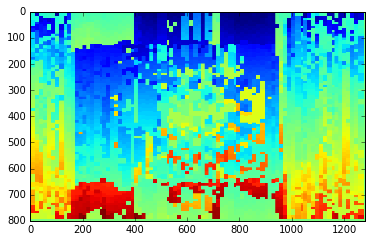

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [109]:
import matplotlib.pyplot as plt
plt.figure('  ')
plt.imshow(image_show)
plt.show()
print(image_show)
np.savetxt('q.txt', image_show)

In [4]:
for items in patch_equal_width[wid].iteritems():
        if items[0] not in dst_photo:
            dst_photo[items[0]] = [0, 999999]
        for i_items in patch_tolerate_width.iteritems():
            dst = np.linalg.norm(np.dot(m_best, np.abs(items[1] - i_items[1])), 2)
            if dst < dst_photo[items[0]][1]:
                dst_photo[items[0]][0] =  items[0][0] - i_items[0][0]
                dst_photo[items[0]][1] =  dst
        image_show[items[0][0]-10: items[0][0]+11 , items[0][1] - 10:items[0][1] +11] = dst
    patch_tolerate_width.clear()
    
for i_items in patch_tolerate_width.iteritems():
    for items in patch_equal_width[wid].iteritems():
        if items[0] not in dst_photo:
            dst_photo[items[0]] = [0, 999999]
        dst = np.linalg.norm(np.dot(m_best, np.abs(items[1] - i_items[1])), 2)
        if dst < dst_photo[items[0]][1]:
                dst_photo[items[0]][0] =  items[0][0] - i_items[0][0]
                dst_photo[items[0]][1] =  dst
patch_tolerate_width.clear() 
for items in dst_photo.iteritems:
    image_show[items[0][0]-10: items[0][0]+11 , items[0][1] - 10:items[0][1] +11] = items[1]
    

            

0


In [129]:
a = np.array([[1,1,1], [1,1,1]])
print(np.linalg.norm(a,2))

2.44948974278


In [130]:
2.449**2

5.9976009999999995

In [27]:
for (x, y) in range(0:100-11 , 0:100-11):
    print(x,y)

SyntaxError: invalid syntax (<ipython-input-27-3d61131a2b85>, line 1)

In [45]:
a = dict()
a

{}

In [ ]:
a.iter